# Reinforcement Learning

# 1. Markov Decision Process

This notebook presents some examples of Markov Decison Processes, where an **agent** interacts with its **environment** and collects **rewards**.

In [40]:
import numpy as np
from copy import deepcopy

## Walk on a line

We start with a walk on a line, with some positions giving positive rewards. There is no terminal state.

In [41]:
from model import Walk
from agent import Agent

In [42]:
# environment
walk = Walk()

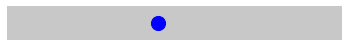

In [43]:
walk.display()

In [44]:
walk.state

4

In [45]:
walk.Length

10

In [46]:
# agent with random policy
agent = Agent(walk)

In [47]:
action = agent.get_action(walk.state)

In [48]:
action

1

In [49]:
reward, stop = walk.step(action)

In [50]:
reward

0

In [51]:
walk.state

5

In [52]:
def simulate(environment, agent, n_steps=50):
    states = []
    rewards = []
    for t in range(n_steps):
        states.append(environment.state)
        action = agent.get_action(environment.state)
        reward, stop = environment.step(action)
        rewards.append(reward)
        if stop:
            break
    return states, rewards

In [53]:
states, rewards = simulate(walk, agent)

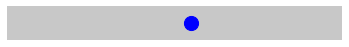

In [54]:
animation = walk.display(states)

In [58]:
animation

In [59]:
rewards[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 1]

In [60]:
np.sum(rewards)

11

## Maze

Now we'll try to escape a maze.

In [61]:
maze_map = np.load('maze.npy')

In [62]:
from model import Maze

In [63]:
maze = Maze()
init_state = (1, 0)
exit_state = (1, 20)
maze.set_parameters(maze_map, init_state, [exit_state])
maze = Maze()

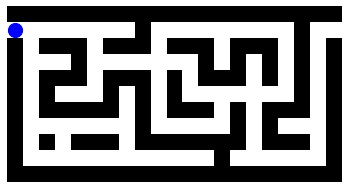

In [64]:
maze.display()

In [65]:
maze.state

array([1, 0])

In [66]:
maze.get_reward(maze.state)

-1

In [67]:
# agent with random policy
agent = Agent(maze)

In [68]:
agent.get_action(maze.state)

(0, 1)

In [69]:
states, rewards = simulate(maze, agent, n_steps=100)

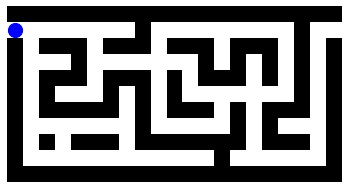

In [70]:
animation = maze.display(states)

In [72]:
animation

In [73]:
np.sum(rewards)

-100

## Games

Finally, let's play games!<br>
Note that in most games:
* you play against an adversary (which is part of the environment),
* you may play first or second,
* when your adversary plays, you have only one possible action (pass).

We here consider [Tic-Tac-Toe](https://en.wikipedia.org/wiki/Tic-tac-toe), [Nim](https://en.wikipedia.org/wiki/Nim) and [Connect Four](https://en.wikipedia.org/wiki/Connect_Four).
Feel free to add more :-)

In [74]:
from model import TicTacToe, Nim, ConnectFour

### Tic-Tac-Toe

In [75]:
game = TicTacToe()

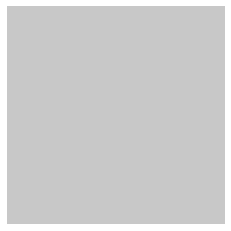

In [78]:
game.display()

In [79]:
# player, board
game.state

[1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])]

In [80]:
agent = Agent(game)

In [81]:
def play(environment, agent):
    states = []
    rewards = []
    state = deepcopy(environment.state)
    stop = environment.is_terminal(state)
    while not stop:
        states.append(state)
        action = agent.get_action(state)
        reward, stop = environment.step(action)
        rewards.append(reward)
        state = deepcopy(environment.state)
    states.append(state)
    return states, rewards

In [82]:
states, rewards = play(game, agent)

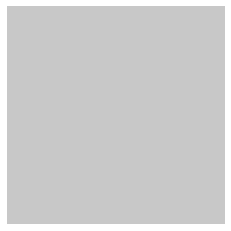

In [83]:
animation = game.display(states)

In [84]:
animation

In [86]:
rewards[-1]

1

In [87]:
# your adversary starts
game = TicTacToe(play_first=False)

In [88]:
agent = Agent(game)

In [89]:
states, rewards = play(game, agent)

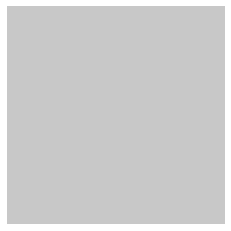

In [90]:
animation = game.display(states)

In [91]:
# you're blue, your adversary is red
animation

In [92]:
rewards[-1]

1

In [93]:
# a better policy
def one_step_policy(state):
    game = TicTacToe()
    player, board = state
    actions = game.get_actions(state)
    # attack
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # defence
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random
    i = np.random.choice(len(actions))
    action = actions[i]
    return [1], [action]

In [94]:
game = TicTacToe()

In [95]:
agent = Agent(game, one_step_policy)

In [96]:
states, rewards = play(game, agent)

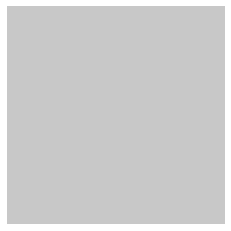

In [97]:
animation = game.display(states)

In [98]:
animation

In [99]:
# your adversary is a bit more intelligent
game = TicTacToe(False, adversary_policy=one_step_policy)

In [100]:
agent = Agent(game, one_step_policy)

In [101]:
states, rewards = play(game, agent)

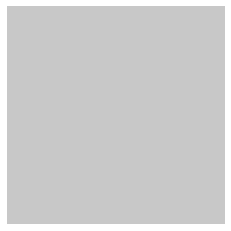

In [102]:
animation = game.display(states)

In [103]:
animation

## To do

Organize a competition and give the rate of wins and ties over 100 matches, when you start.

### Nim

In [112]:
game = Nim()

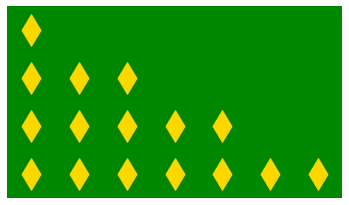

In [113]:
game.display()

In [114]:
# player, board
game.state

[1, array([1, 3, 5, 7])]

In [115]:
agent = Agent(game)

In [116]:
game.step()

(None, True)

In [109]:
states, rewards = play(game, agent)

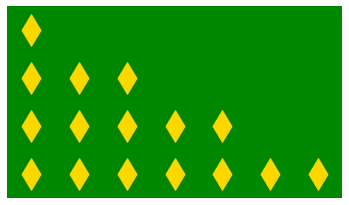

In [110]:
animation = game.display(states)

In [111]:
animation

## To do 

Play and try to win!

In [117]:
game = Nim()

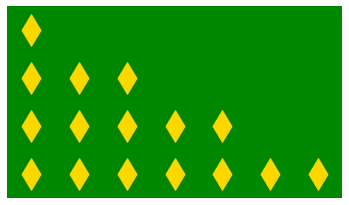

In [118]:
game.display()

In [119]:
# your turn
action = (1, 3)
game.step((1, 3))

(0, False)

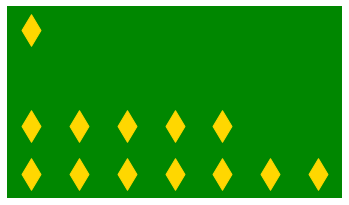

In [120]:
game.display()

In [121]:
# adversary
game.step()

(0, False)

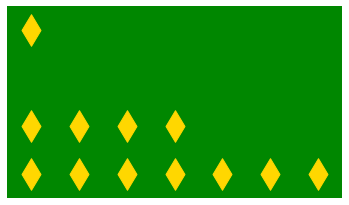

In [122]:
game.display()

### Connect Four

In [123]:
game = ConnectFour()

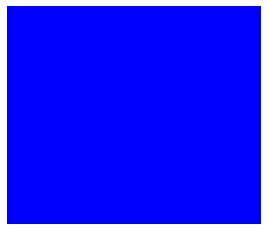

In [124]:
game.display()

In [125]:
game.state

[1,
 array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])]

In [126]:
agent = Agent(game)

In [127]:
states, rewards = play(game, agent)

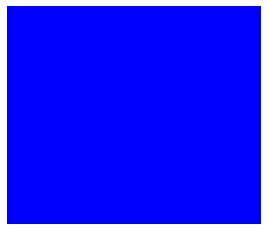

In [128]:
animation = game.display(states)

In [129]:
animation

## To do

Test the one-step-policy. What is your win rate if your adversary plays at random?

In [130]:
def one_step_policy(state):
    game = ConnectFour()
    player, board = state
    actions = game.get_actions(state)
    # attack
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # defence
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random
    i = np.random.choice(len(actions))
    action = actions[i]
    return [1], [action]

In [131]:
game = ConnectFour(False, one_step_policy)

In [132]:
agent = Agent(game, one_step_policy)

In [133]:
states, rewards = play(game, agent)

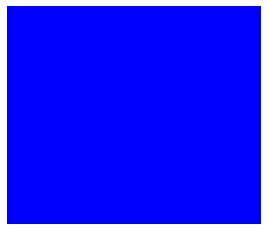

In [134]:
animation = game.display(states)

In [135]:
animation